### This code is used to train the RoBERTa model

In [1]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer

# Import STOPWORDS from NLTK
from nltk.corpus import stopwords

import string, re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [4]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
time: 382 µs (started: 2023-04-23 03:35:48 +00:00)


In [5]:
# # data = pd.read_csv('dataset_cleaned.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/VarshithaCVasireddy/datasets/main/dataset_str1.csv?token=GHSAT0AAAAAACADFJF5GB6A6O6N5V6HM2SMZCETTTQ')

time: 1.53 s (started: 2023-04-23 01:51:59 +00:00)


In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

time: 1.21 s (started: 2023-04-23 03:36:01 +00:00)


In [ ]:
data.title = [Text.lower() for Text in data.title]
def sentence_tokenize(text: str):
    return nltk.sent_tokenize(text)

data['Sentences'] = data['title'].apply(sentence_tokenize)

time: 964 ms (started: 2023-04-11 01:28:28 +00:00)


In [ ]:
def word_tokenize(sentences: list[str]):
    words: list[str] = []
    lemmatizer = WordNetLemmatizer()
    for sent in sentences:
        for word in nltk.word_tokenize(sent):
            if word not in stopwords.words('english') and word not in string.punctuation:
                word = re.sub(r"[^a-zA-Z0-9\s.]", "", word)
                words.append(lemmatizer.lemmatize(word))

    return words 

data['Words'] = data['Sentences'].apply(word_tokenize)

time: 1min 21s (started: 2023-04-11 01:28:29 +00:00)


In [ ]:
data['str1'] = [' '.join(doc) for doc in data.Words]

time: 24.1 ms (started: 2023-04-11 01:29:51 +00:00)


In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.0 MB/s eta 0:00:00
time: 14.6 s (started: 2023-04-23 03:36:08 +00:00)


In [7]:
import torch
from sklearn.model_selection import train_test_split
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments

time: 12.7 s (started: 2023-04-23 03:36:26 +00:00)


In [8]:
from sklearn.metrics import accuracy_score, classification_report

time: 391 µs (started: 2023-04-23 03:36:39 +00:00)


In [10]:
# # Split the dataset into training, validation, and test sets
# train_df, tmp_df = train_test_split(data, test_size=0.3, random_state=42)
# val_df, test_df = train_test_split(tmp_df, test_size=0.5, random_state=42)

time: 26.7 ms (started: 2023-04-23 01:52:38 +00:00)


In [10]:
train_df = pd.read_csv('https://raw.githubusercontent.com/VarshithaCVasireddy/datasets/main/train_df.csv?token=GHSAT0AAAAAACADFJF5522LMSI547YO4KFOZCEWYKA')

time: 511 ms (started: 2023-04-23 03:38:20 +00:00)


In [12]:
val_df = pd.read_csv('https://raw.githubusercontent.com/VarshithaCVasireddy/datasets/main/val_df.csv?token=GHSAT0AAAAAACADFJF424AP3GPMHY2PHGLAZCEWZQQ')

time: 318 ms (started: 2023-04-23 03:39:07 +00:00)


In [11]:
test_df = pd.read_csv('https://raw.githubusercontent.com/VarshithaCVasireddy/datasets/main/test_df.csv?token=GHSAT0AAAAAACADFJF5ARDWDSL62ULXXNCKZCEWX3A')

time: 129 ms (started: 2023-04-23 03:38:53 +00:00)


In [14]:
# Load the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

time: 1.62 s (started: 2023-04-23 03:39:25 +00:00)


In [15]:
# Encode the training, validation, and test sets
train_encodings = tokenizer(train_df['str1'].tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_df['str1'].tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_df['str1'].tolist(), truncation=True, padding=True)

time: 9.24 s (started: 2023-04-23 03:39:26 +00:00)


In [ ]:
print(len(train_encodings['input_ids']))
print(len(val_encodings['input_ids']))
print(len(test_encodings['input_ids']))

31259
6699
6699
time: 4.34 ms (started: 2023-04-11 01:34:22 +00:00)


In [16]:
# Convert 'Label' column to numeric labels
label_map = {'Fake': 0, 'Real': 1}
train_labels = [label_map[label] for label in train_df['label'].tolist()]
val_labels = [label_map[label] for label in val_df['label'].tolist()]
test_labels = [label_map[label] for label in test_df['label'].tolist()]

# Create PyTorch datasets
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_labels)
)

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    torch.tensor(val_labels)
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(test_labels)
)

time: 518 ms (started: 2023-04-23 03:39:36 +00:00)


In [18]:
print(train_dataset[0][0].shape) # input_ids shape
print(train_dataset[0][1].shape) # attention_mask shape
print(train_dataset[0][2].shape) # train_labels_onehot shape

print(val_dataset[0][0].shape) # input_ids shape
print(val_dataset[0][1].shape) # attention_mask shape
print(val_dataset[0][2].shape) # val_labels_onehot shape

print(test_dataset[0][0].shape) # input_ids shape
print(test_dataset[0][1].shape) # attention_mask shape
print(test_dataset[0][2].shape) # test_labels_onehot shape

torch.Size([52])
torch.Size([52])
torch.Size([])
torch.Size([50])
torch.Size([50])
torch.Size([])
torch.Size([45])
torch.Size([45])
torch.Size([])
time: 18.5 ms (started: 2023-04-23 01:54:56 +00:00)


In [17]:
# Load the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

time: 9.66 s (started: 2023-04-23 03:39:36 +00:00)


In [18]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=50,
    learning_rate=5e-5,
)

time: 83 ms (started: 2023-04-23 03:39:46 +00:00)


In [19]:
# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=lambda data: {'input_ids': torch.stack([item[0] for item in data]),
                                'attention_mask': torch.stack([item[1] for item in data]),
                                'labels': torch.stack([item[2] for item in data])},
)

time: 7.83 s (started: 2023-04-23 03:39:46 +00:00)


In [20]:
# Train the model
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
50,0.680800,0.676348
100,0.299100,0.224664
150,0.216300,0.212232
200,0.280000,0.229381
250,0.142000,0.159336
300,0.238500,0.214962
350,0.238200,0.275847
400,0.258600,0.222006
450,0.248100,0.181883
500,0.276700,0.166695


TrainOutput(global_step=5082, training_loss=0.14110500798243641, metrics={'train_runtime': 2513.6611, 'train_samples_per_second': 32.34, 'train_steps_per_second': 2.022, 'total_flos': 1921628509489080.0, 'train_loss': 0.14110500798243641, 'epoch': 3.0})

time: 41min 53s (started: 2023-04-23 03:39:54 +00:00)


In [21]:
label_map = {'Fake': 0, 'Real': 1}
# Evaluate the model on the test set
preds = trainer.predict(test_dataset)
pred_labels = preds.predictions.argmax(-1)

# Convert the true labels to integers
true_labels = [label_map[label] for label in test_df['label'].tolist()]

# Compute the accuracy and classification report
accuracy = accuracy_score(true_labels, pred_labels)
class_report = classification_report(true_labels, pred_labels, target_names=['Fake', 'Real'])

print(f"Accuracy for RoBERTa: {accuracy}")
print(f"Classification Report:\n{class_report}")


Accuracy for RoBERTa: 0.9684863096263131
Classification Report:
              precision    recall  f1-score   support

        Fake       0.98      0.95      0.97      2667
        Real       0.96      0.99      0.97      3140

    accuracy                           0.97      5807
   macro avg       0.97      0.97      0.97      5807
weighted avg       0.97      0.97      0.97      5807

time: 15 s (started: 2023-04-23 04:21:47 +00:00)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Compute precision, recall, and F1 score
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

# Compute confusion matrix
confusion_mat = confusion_matrix(true_labels, pred_labels)

# Compute ROC AUC score
roc_auc = roc_auc_score(true_labels, pred_labels)

# Print results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)
print(f"ROC AUC Score: {roc_auc}")

Precision: 0.9575982667904673
Recall: 0.9853503184713376
F1 Score: 0.9712760948045833
Confusion Matrix:
[[2530  137]
 [  46 3094]]
ROC AUC Score: 0.9669908697718519
time: 45 ms (started: 2023-04-23 04:22:02 +00:00)


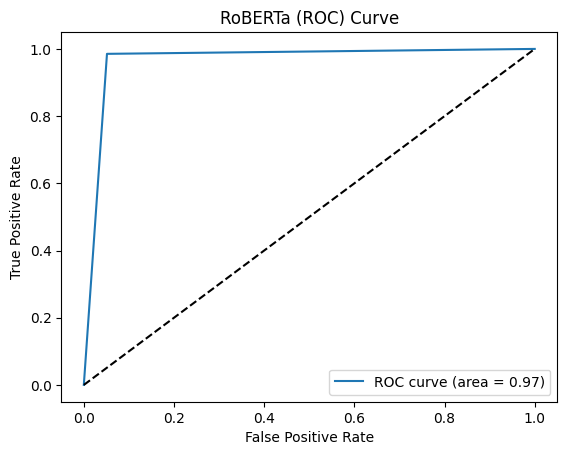

time: 242 ms (started: 2023-04-23 04:22:57 +00:00)


In [24]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RoBERTa (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [26]:
model.push_to_hub("News_Title_RoBERTa")

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Varshitha/News_Title_RoBERTa/commit/e27a55eebb55ea7ab2de881378e09058e1bf5169', commit_message='Upload RobertaForSequenceClassification', commit_description='', oid='e27a55eebb55ea7ab2de881378e09058e1bf5169', pr_url=None, pr_revision=None, pr_num=None)

time: 20.1 s (started: 2023-04-23 04:23:25 +00:00)


In [27]:
tokenizer.push_to_hub("News_Title_RoBERTa")

CommitInfo(commit_url='https://huggingface.co/Varshitha/News_Title_RoBERTa/commit/236c158675f73bde4a3ee738945278b727c8e56b', commit_message='Upload tokenizer', commit_description='', oid='236c158675f73bde4a3ee738945278b727c8e56b', pr_url=None, pr_revision=None, pr_num=None)

time: 1.26 s (started: 2023-04-23 04:23:45 +00:00)
